In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.4.1


In [2]:
data  = pd.read_csv('./age_gender.csv')
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))

data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."
5,1,2,0,20161220144957407.jpg.chip.jpg,"[195.0, 198.0, 200.0, 200.0, 198.0, 198.0, 199..."
6,1,2,0,20161220145040127.jpg.chip.jpg,"[208.0, 216.0, 217.0, 219.0, 222.0, 223.0, 222..."
7,1,2,0,20170109191125532.jpg.chip.jpg,"[99.0, 142.0, 169.0, 177.0, 179.0, 181.0, 183...."
8,1,2,0,20161219222749039.jpg.chip.jpg,"[127.0, 127.0, 133.0, 140.0, 143.0, 148.0, 152..."
9,1,2,0,20170109191209991.jpg.chip.jpg,"[199.0, 211.0, 211.0, 214.0, 216.0, 216.0, 219..."


In [3]:
data.shape

(23705, 5)

In [4]:
data.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [5]:
data['pixels'] = data['pixels'].apply(lambda x: x/255)

In [6]:
X = np.array(data['pixels'].tolist())
X = X.reshape(X.shape[0], 48, 48, 1)

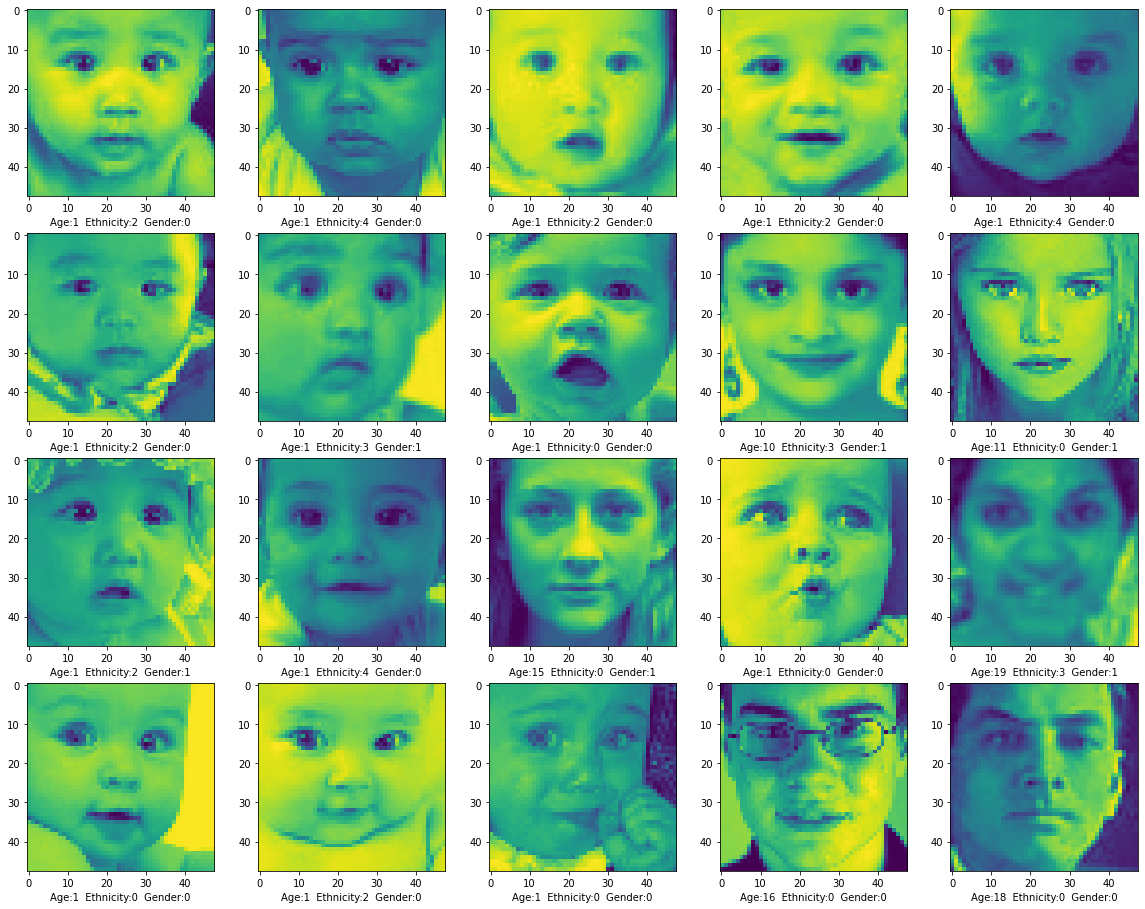

In [7]:
plt.figure(figsize=(20,20))
for i in range(20):
    num = np.random.randint(200)
    plt.subplot(5,5,(i%25)+1)
    dig = i*num
    plt.imshow(X[dig])
    plt.xlabel(
        "Age:"+str(data['age'].iloc[dig])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[dig])+
        "  Gender:"+ str(data['gender'].iloc[dig])
    )

In [8]:
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print('Xtrain: ',X_train.shape)
print('Xtest: ',X_test.shape)
print('ytrain: ',y_train.shape)
print('ytest: ',y_test.shape)


Xtrain:  (18964, 48, 48, 1)
Xtest:  (4741, 48, 48, 1)
ytrain:  (18964,)
ytest:  (4741,)


In [10]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(48,48,1)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(rate=0.6),
    keras.layers.Dense(1, activation='sigmoid')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2600):
            print("\nReached 0.2000 val_loss so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0

In [11]:

model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, y_train, epochs=15, validation_split=0.1, batch_size=64, callbacks=[callback])

Epoch 1/15
267/267 [==============================] - 54s 188ms/step - loss: 0.6137 - accuracy: 0.6633 - val_loss: 0.6085 - val_accuracy: 0.7828
Epoch 2/15
267/267 [==============================] - 47s 175ms/step - loss: 0.4706 - accuracy: 0.7786 - val_loss: 0.4499 - val_accuracy: 0.8287
Epoch 3/15
267/267 [==============================] - 67s 252ms/step - loss: 0.4241 - accuracy: 0.8114 - val_loss: 0.3631 - val_accuracy: 0.8445
Epoch 4/15
267/267 [==============================] - 59s 219ms/step - loss: 0.3849 - accuracy: 0.8324 - val_loss: 0.3432 - val_accuracy: 0.8508
Epoch 5/15
267/267 [==============================] - 56s 210ms/step - loss: 0.3518 - accuracy: 0.8448 - val_loss: 0.3369 - val_accuracy: 0.8571
Epoch 6/15
267/267 [==============================] - 55s 204ms/step - loss: 0.3434 - accuracy: 0.8474 - val_loss: 0.3297 - val_accuracy: 0.8577
Epoch 7/15
267/267 [==============================] - 38s 144ms/step - loss: 0.3224 - accuracy: 0.8612 - val_loss: 0.3090 - val_ac

In [13]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2797849178314209
Test Accuracy: 0.8787175416946411


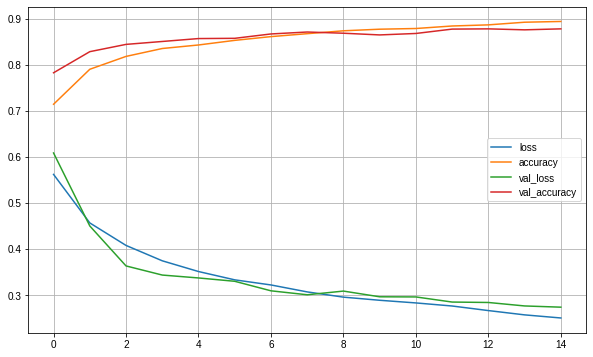

In [14]:
pd.DataFrame(hist.history).plot(figsize=(10,6))
plt.style.use('seaborn-dark')
plt.grid(True)
plt.show()